## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import utils_01 as utils

%load_ext autoreload
%autoreload 2

## 01 USA Gov Data Analysis with Python

### 01 Load Data into list of dicts

In [2]:
usa = utils.USA_GOV()
usa.records[0]  # first record

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [3]:
len(usa.records)  # number of records

3560

### 02 Counting time zones

In [22]:
N = 10

In [23]:
# Simple approach, no sorting
counts = usa.count_time_zones(approach='simple')
list(counts.items())[:N]  # first 10 items

[('America/New_York', 1251),
 ('America/Denver', 191),
 ('America/Sao_Paulo', 33),
 ('Europe/Warsaw', 16),
 ('', 521),
 ('America/Los_Angeles', 382),
 ('Asia/Hong_Kong', 10),
 ('Europe/Rome', 27),
 ('Africa/Ceuta', 2),
 ('Europe/Madrid', 35)]

In [24]:
# Simple approach, return top 10 sorted
counts = usa.count_time_zones(approach='simple', top=N)
counts

{'America/New_York': 1251,
 '': 521,
 'America/Chicago': 400,
 'America/Los_Angeles': 382,
 'America/Denver': 191,
 'Europe/London': 74,
 'Asia/Tokyo': 37,
 'Pacific/Honolulu': 36,
 'Europe/Madrid': 35,
 'America/Sao_Paulo': 33}

In [25]:
# Default dictionary approach, return top 10 sorted
counts = usa.count_time_zones(approach='defaultdict', top=N)
counts

{'America/New_York': 1251,
 '': 521,
 'America/Chicago': 400,
 'America/Los_Angeles': 382,
 'America/Denver': 191,
 'Europe/London': 74,
 'Asia/Tokyo': 37,
 'Pacific/Honolulu': 36,
 'Europe/Madrid': 35,
 'America/Sao_Paulo': 33}

In [26]:
# Counter approach, return top 10 sorted
counts = usa.count_time_zones(approach='Counter')
counts.most_common(N)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 02 Counting Time Zones with `pandas`

In [27]:
usa = utils.USA_GOV()

In [28]:
usa.records_df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [29]:
usa.records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [30]:
usa.records_df[usa.TZ].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [31]:
usa.records_df[usa.TZ].value_counts().sort_values(ascending=False).head(N)

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [32]:
# Let's fill in missing values with "Missing"
usa = utils.USA_GOV(fill=True)

In [33]:
# Check that there are no missing values
usa.records_df[usa.TZ].isnull().sum()

np.int64(0)

In [ ]:
counts = usa.count_time_zones_pandas()
counts.head(N)

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

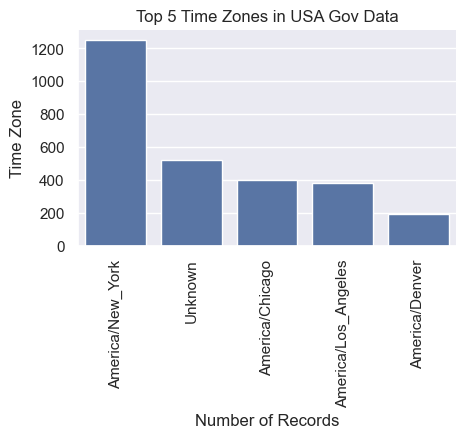

In [39]:
usa.plot_time_zones()

## 03 More operations with `pandas`

### 01 Get user agents

In [66]:
usa = utils.USA_GOV()

In [67]:
user_agents = usa.get_user_agents()
user_agents.head()

a
Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
Name: count, dtype: int64

### 02 Decompose into Windows and non-Windows users

In [73]:
usa = utils.USA_GOV()

In [75]:
usa.decomposed_os[usa.OS].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [77]:
usa.pivot_os.head()

os,Not Windows,Windows,total
tz,,,
America/New_York,339,912,1251
Unknown,245,276,521
America/Chicago,115,285,400
America/Los_Angeles,130,252,382
America/Denver,132,59,191


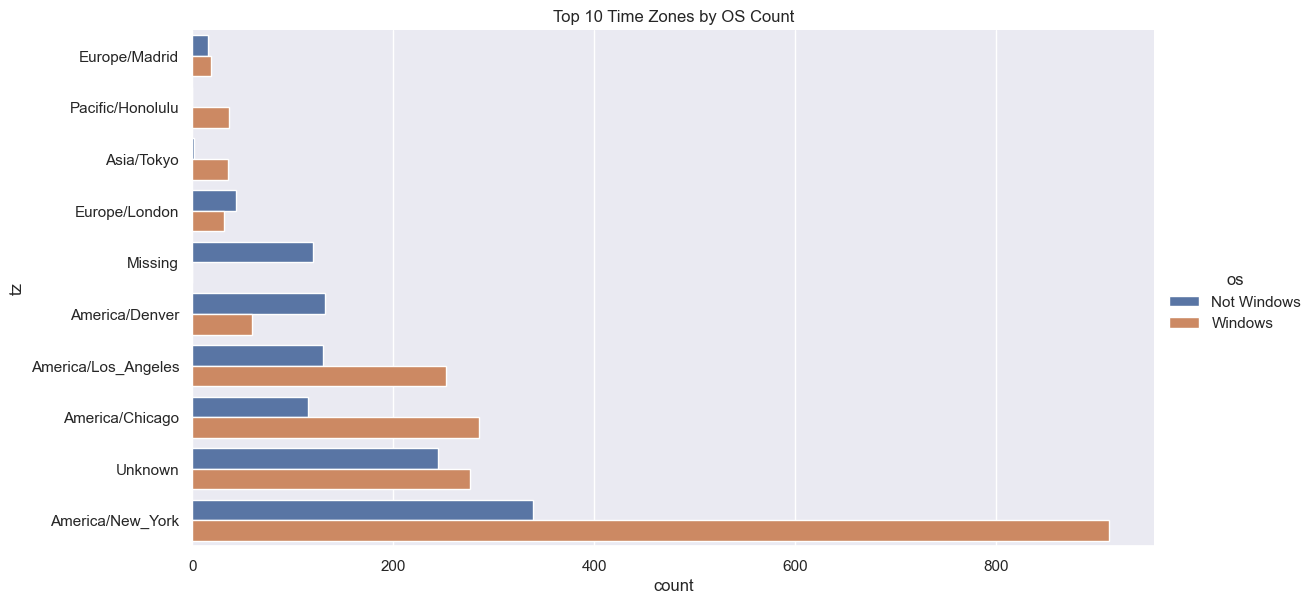

In [87]:
usa.plot_time_zones_by_os()

#### DEBUGGING

In [88]:
# Copy existing pivot table
long_pivot = usa.pivot_os.copy()

# Extract top N time zones
long_pivot = long_pivot.head(10)

# Sort in an opposite order for better visualization
long_pivot = long_pivot.sort_values(by=usa.TOTAL, ascending=True)

# Drop the 'total' column for plotting
long_pivot = long_pivot.drop(columns=[usa.TOTAL])

In [89]:
long_pivot

os,Not Windows,Windows
tz,,
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
Missing,120,0
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
Unknown,245,276


In [91]:
# Melt pivot_os to long format
long_pivot.reset_index().melt(
    id_vars=usa.TZ, 
    value_vars=['Not Windows', 'Windows'], 
    # var_name=usa.OS, 
    # value_name='count'
)

,tz,os,value
0,Europe/Madrid,Not Windows,16
1,Pacific/Honolulu,Not Windows,0
2,Asia/Tokyo,Not Windows,2
3,Europe/London,Not Windows,43
4,Missing,Not Windows,120
5,America/Denver,Not Windows,132
6,America/Los_Angeles,Not Windows,130
7,America/Chicago,Not Windows,115
8,Unknown,Not Windows,245
9,America/New_York,Not Windows,339
